In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
Base_polpop_iell_csrf=pd.read_csv('E:\MS\Base_polpop_iell_csrf_17oct.csv')

In [9]:
for i in Base_polpop_iell_csrf.columns:
    print(i)

Unnamed: 0
City_poll
Type_of_Location
year_number
month_number
NO2_Median
RSPM_PM10_Median
SO2_Median
SPM_Median
Median_SO2_MOM_diff
Median_NO2_MOM_diff
Median_RSPM_PM10_MOM_diff
Median_SPM_MOM_diff
NO2_P10
RSPM_PM10_P10
SO2_P10
SPM_P10
P10_NO2_MOM_diff
P10_SO2_MOM_diff
P10_RSPM_PM10_MOM_diff
P10_SPM_MOM_diff
NO2_P90
RSPM_PM10_P90
SO2_P90
SPM_P90
month_number_diff
P90_NO2_MOM_diff
P90_SO2_MOM_diff
P90_RSPM_PM10_MOM_diff
P90_SPM_MOM_diff
year_number_diff
NO2_Median_YOY_diff
SO2_Median_YOY_diff
RSPM_PM10_Median_YOY_diff
SPM_Median_YOY_diff
NO2_P10_YOY_diff
SO2_P10_YOY_diff
RSPM_PM10_P10_YOY_diff
SPM_P10_YOY_diff
NO2_P90_YOY_diff
SO2_P90_YOY_diff
RSPM_PM10_P90_YOY_diff
SPM_P90_YOY_diff
city_pp
Year_pp
Male
Female
Total
Population_Density
Sex_Ratio
Literacy_Rate
City
elevation_in_mtrs
lowlatitude
highlatitude
lowlongitude
highlongitude
forestarea_in_thhector
forestarea_in_percentage
overall_area_thhector
non_forest_area
non_forest_area_percentage
Non_Agriculturea_Land
Non_Agriculturea_Land

In [7]:
Base_polpop_iell_csrf.isnull().sum()
   

Unnamed: 0               0
City_poll                0
Type_of_Location         0
year_number              0
month_number             0
                      ... 
indus_by_nonforest     919
rec_id                   0
RainPerArea           4251
CarSalesPerArea       4474
RainPerCarSales       5235
Length: 106, dtype: int64

In [13]:
YearClusterDataNSo2=Base_polpop_iell_csrf[['rec_id','RSPM_PM10_Median','RSPM_PM10_P10','RSPM_PM10_P90']]

In [14]:
YearClusterDataNSo2.isnull().any(axis=0) 

rec_id              False
RSPM_PM10_Median     True
RSPM_PM10_P10        True
RSPM_PM10_P90        True
dtype: bool

In [15]:
YearClusterDataNSo2.isnull().sum()

rec_id                 0
RSPM_PM10_Median    1738
RSPM_PM10_P10       1738
RSPM_PM10_P90       1738
dtype: int64

In [16]:
YearClusterDataNSo2.dropna(inplace=True)

In [17]:
YearClusterDataNSo2_ori=YearClusterDataNSo2

In [18]:
YearClusterDataNSo2=YearClusterDataNSo2[['RSPM_PM10_Median','RSPM_PM10_P10','RSPM_PM10_P90']]

In [19]:
YearClusterDataNSo2.isnull().sum()

RSPM_PM10_Median    0
RSPM_PM10_P10       0
RSPM_PM10_P90       0
dtype: int64

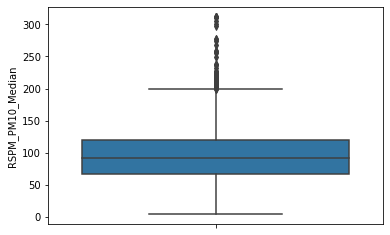

In [21]:
sns.boxplot(y="RSPM_PM10_Median", data=YearClusterDataNSo2)

In [22]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
YearClusterDataNSo2_norm = standard_scaler.fit_transform(YearClusterDataNSo2)

In [29]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
hopkins(YearClusterDataNSo2_norm)

0.949758625913875

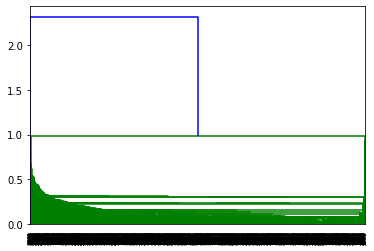

In [31]:
# heirarchical clustering
mergings = linkage(YearClusterDataNSo2_norm, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

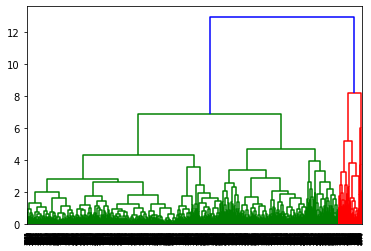

In [32]:
# heirarchical clustering
mergings = linkage(YearClusterDataNSo2_norm, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### seems like 2 clusters

In [33]:
YearClusterDataNSo2_ori.head()

,rec_id,RSPM_PM10_Median,RSPM_PM10_P10,RSPM_PM10_P90
0,0,149.0,129.0,153.8
1,1,143.0,138.2,147.8
2,2,139.0,139.0,139.0
3,3,165.0,164.2,166.0
4,4,148.0,136.4,161.2


In [59]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
YearClusterDataNSo2_OriClus = pd.concat([YearClusterDataNSo2_ori, clusterCut], axis=1)

In [60]:
YearClusterDataNSo2_OriClus.columns

Index(['rec_id', 'RSPM_PM10_Median', 'RSPM_PM10_P10', 'RSPM_PM10_P90', 0], dtype='object')

In [61]:
YearClusterDataNSo2_OriClus.columns=['rec_id', 'RSPM_PM10_Median', 'RSPM_PM10_P10', 'RSPM_PM10_P90',    'ClusterId']

In [62]:
YearClusterDataNSo2_OriClus.head()

,rec_id,RSPM_PM10_Median,RSPM_PM10_P10,RSPM_PM10_P90,ClusterId
0,0.0,149.0,129.0,153.8,0.0
1,1.0,143.0,138.2,147.8,0.0
2,2.0,139.0,139.0,139.0,0.0
3,3.0,165.0,164.2,166.0,0.0
4,4.0,148.0,136.4,161.2,0.0


In [63]:
clusters_RSPM_PM10_Median = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).RSPM_PM10_Median.mean())
clusters_RSPM_PM10_P10 = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).RSPM_PM10_P10.mean())
clusters_RSPM_PM10_P90 = 	pd.DataFrame(YearClusterDataNSo2_OriClus.groupby(["ClusterId"]).RSPM_PM10_P90.mean())

In [65]:
df = pd.concat([pd.Series([0,1,2,3]), clusters_RSPM_PM10_P10, clusters_RSPM_PM10_Median, clusters_RSPM_PM10_P90], axis=1)
df.columns = ["ClusterID", "clusters_RSPM_PM10_P10", "clusters_RSPM_PM10_Median", "clusters_RSPM_PM10_P90"]
df.head()

,ClusterID,clusters_RSPM_PM10_P10,clusters_RSPM_PM10_Median,clusters_RSPM_PM10_P90
0.0,0,79.574946,109.421630,147.710551
1.0,1,70.243156,104.866080,156.462370
2.0,2,62.753552,95.032661,139.911749
3.0,3,67.945455,113.409091,154.236364


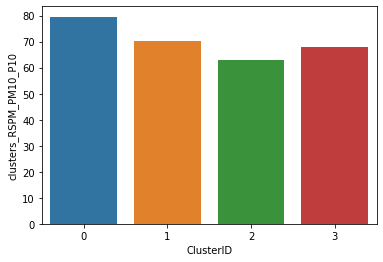

In [66]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_RSPM_PM10_P10)

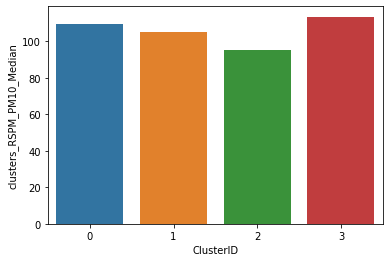

In [67]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_RSPM_PM10_Median)

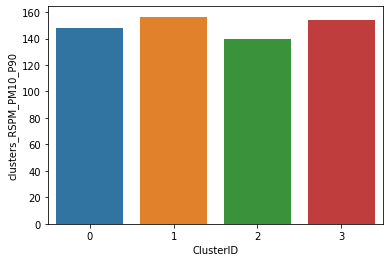

In [68]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.clusters_RSPM_PM10_P90)

In [69]:
df.columns

Index(['ClusterID', 'clusters_RSPM_PM10_P10', 'clusters_RSPM_PM10_Median',
       'clusters_RSPM_PM10_P90'],
      dtype='object')

                   variables      values
0                  ClusterID    0.000000
1     clusters_RSPM_PM10_P10   79.574946
2  clusters_RSPM_PM10_Median  109.421630
3     clusters_RSPM_PM10_P90  147.710551
                   variables      values
0                  ClusterID    1.000000
1     clusters_RSPM_PM10_P10   70.243156
2  clusters_RSPM_PM10_Median  104.866080
3     clusters_RSPM_PM10_P90  156.462370
                   variables      values
0                  ClusterID    2.000000
1     clusters_RSPM_PM10_P10   62.753552
2  clusters_RSPM_PM10_Median   95.032661
3     clusters_RSPM_PM10_P90  139.911749
                   variables      values
0                  ClusterID    3.000000
1     clusters_RSPM_PM10_P10   67.945455
2  clusters_RSPM_PM10_Median  113.409091
3     clusters_RSPM_PM10_P90  154.236364


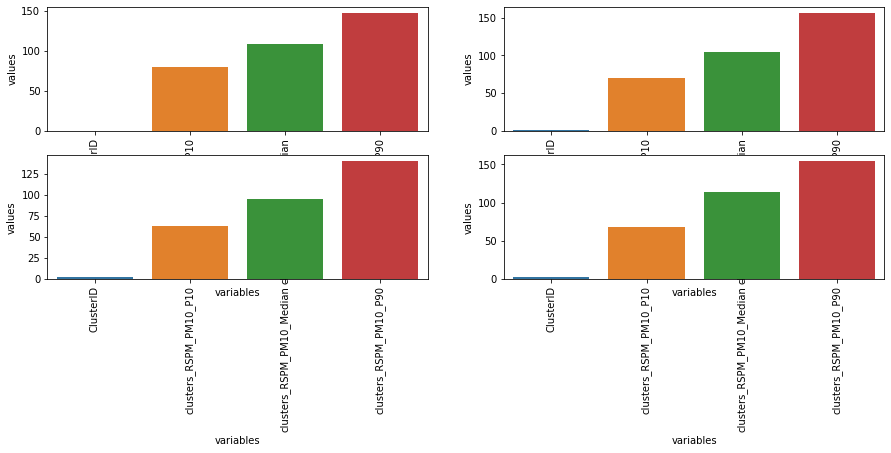

In [71]:
plt.figure(figsize = (15,5))
for i in range(0, 4):    
    ClusterOne=np.transpose(df[df.ClusterID==i])
    ClusterOne.reset_index(inplace=True)
    ClusterOne.columns=['variables', 'values']
    ClusterOne['values']=ClusterOne['values'].map(float)
    print(ClusterOne)
    plt.subplot(2, 2, i+1)
    t=sns.barplot(x='variables',y='values',data=ClusterOne)
    t.set_xticklabels(labels=ClusterOne.variables,rotation=90)

In [72]:
YearClusterDataNSo2_OriClus.columns

Index(['rec_id', 'RSPM_PM10_Median', 'RSPM_PM10_P10', 'RSPM_PM10_P90',
       'ClusterId'],
      dtype='object')

In [73]:
woyCluster=YearClusterDataNSo2_OriClus[['rec_id','ClusterId']]

In [74]:
Base_polpop_iell_csrf_ClusWoYear=Base_polpop_iell_csrf.merge(woyCluster,how='left', suffixes=('_data', '_cluster'),left_on=['rec_id'], right_on=['rec_id'])

In [75]:
Base_polpop_iell_csrf_ClusWoYear.columns

Index(['Unnamed: 0', 'City_poll', 'Type_of_Location', 'year_number',
       'month_number', 'NO2_Median', 'RSPM_PM10_Median', 'SO2_Median',
       'SPM_Median', 'Median_SO2_MOM_diff',
       ...
       'Main_District_Highway_per', 'Other_district_Rural_Roads_per',
       'indus_by_overall', 'indus_by_forest', 'indus_by_nonforest', 'rec_id',
       'RainPerArea', 'CarSalesPerArea', 'RainPerCarSales', 'ClusterId'],
      dtype='object', length=107)

In [76]:
Base_ClusWoYear=Base_polpop_iell_csrf_ClusWoYear[['City_poll','Type_of_Location', 'ClusterId','year_number','month_number']]

In [77]:
Base_ClusWoYear.head()

,City_poll,Type_of_Location,ClusterId,year_number,month_number
0,AKOLA,Industrial,0.0,2011,1.0
1,AKOLA,Industrial,0.0,2011,2.0
2,AKOLA,Industrial,0.0,2011,3.0
3,AKOLA,Industrial,0.0,2011,4.0
4,AKOLA,Industrial,0.0,2011,5.0


In [78]:
Base_ClusWoYear=Base_ClusWoYear.sort_values(by=['City_poll', 'year_number','month_number'])

In [79]:
Base_ClusWoYear.shape

(5715, 5)

In [80]:
Base_ClusWoYear.head()

,City_poll,Type_of_Location,ClusterId,year_number,month_number
0,AKOLA,Industrial,0.0,2011,1.0
12,AKOLA,Residential,1.0,2011,1.0
1,AKOLA,Industrial,0.0,2011,2.0
13,AKOLA,Residential,1.0,2011,2.0
2,AKOLA,Industrial,0.0,2011,3.0


In [81]:
Base_ClusWoYear.to_csv(path_or_buf ='E:\MS\Base_spm_23oct.csv')

---- kmeans

In [56]:
# Kmeans with K=4
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(YearClusterDataNSo2_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.m

In [57]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(YearClusterDataNSo2_norm)
    sse_.append([k, silhouette_score(YearClusterDataNSo2_norm, kmeans.labels_)])

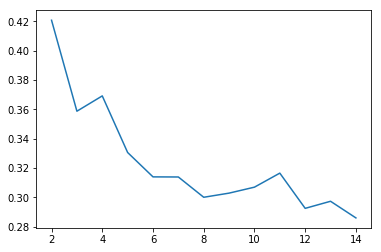

In [62]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### 4 seems to get a spike

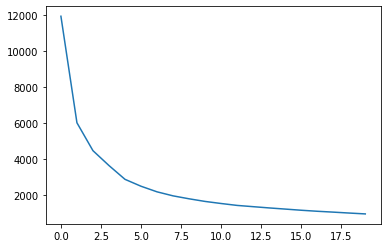

In [58]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(YearClusterDataNSo2_norm)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

#### 5 is at a lower end may be four truely is better